In [1]:
import numpy as np
import EFIE as solve
light_speed, mu0, eps0 = 299792458., 4*np.pi*1e-7, 8.854e-12

frequency = 1e6 * 146
omega, wavelength = 2 * np.pi * frequency, light_speed / frequency
incident_field, radius = 10, 3.175e-3
delta_r = wavelength / 10e2

class yagi:
    def __init__(self, position, angle, length, source_position, radius):
        self.position = position
        self.angle = angle
        self.length = length
        self.source_position = source_position
        self.radius = radius

structure_type = 'yagi-uda'
pos = np.array([[0.0, 0.0, 0.0]])
angle = np.array([[0.0, 0.0]])
lengths = np.array([wavelength/2])
source_position = np.array([[0.0, 0.0, 0.0, 10]])
radii = np.array([radius])
test = yagi(pos, angle, lengths, source_position, radii)

In [2]:
current, R = solve.calc_current_distribution(structure_type=structure_type, antenna=test, frequency=frequency, delta_r=delta_r)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\lukas\OneDrive\Документы\Method-of-moment-for-antennas\MyMomVenv\Lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
100%|██████████| 1/1 [04:20<00:00, 260.92s/it]


In [3]:
E_total, phi = solve.calc_directional_pattern(phi=0, theta=0, current=current, R=R, delta_r=delta_r, frequency=frequency)

0.032471664915841844


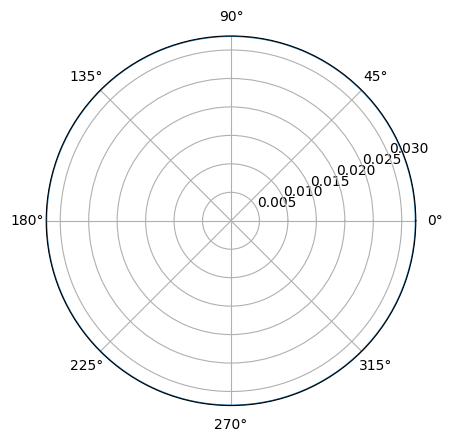

In [4]:
import matplotlib.pyplot as plt
plt.polar(phi, E_total)
print(np.max(E_total))

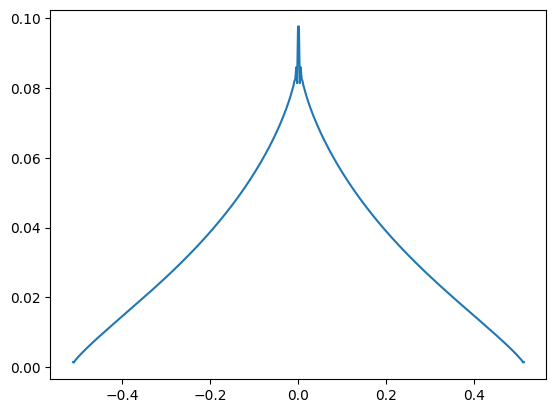

In [5]:
plt.plot(R[:,2],np.abs(current))

In [6]:

import numpy as np
import plotly.graph_objects as go

def current_distribution_3d (R, current):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=R[:,0],
        y=R[:,1],
        z=R[:,2],
        mode='markers',
        marker=dict(
            size=3,
            color=np.abs(current),
            colorscale='plasma',
            showscale=True,
            colorbar=dict(title='Amplitude of current, A')
        )
    ))
    fig.update_layout(
        title='Induced Current Distribution in 3D',
        scene=dict(
            xaxis_title='X position, m',
            yaxis_title='Y position, m',
            zaxis_title='Z position, m'
        )
    )
    fig.show()
current_distribution_3d(R,current)